In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('Assignment2_2023_Data.txt', delimiter = ' ')

In [4]:
df.head()

,ALLEN.P,1.080,3,425,83,27,3.1,1,2,0.60,2.8,1.1,44,57,44.1,68,5,7
0,ALLIGATOR.P,0.025,2,1494,47,26.0,2.0,0.0,1.0,0.69,0.8,1.0,45,37,50,69,12,30
1,ANASAGUNTICOOK.L,0.570,5,402,568,54.0,2.0,1.0,15.0,0.56,1.1,0.0,44,25,13,70,19,22
2,BALCH&STUMP.PONDS,0.770,5,557,704,44.0,2.0,1.0,14.0,0.58,2.7,0.0,43,37,0,70,59,4
3,BASKAHEGAN.L,0.790,5,417,6944,22.0,2.0,0.0,123.0,0.57,2.0,1.0,45,30,32,67,50,2
4,BAUNEAG.BEG.L,0.750,4,205,200,29.0,2.0,1.0,18.0,0.51,9.6,0.0,43,21,46,70,44,23


In [5]:
df.describe()

,1.080,3,425,83,27,3.1,1,2,0.60,2.8,1.1,44,57,44.1,68,5,7
count,119.000000,119.000000,119.000000,119.000000,118.000000,118.000000,117.000000,116.000000,112.000000,112.00000,117.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,0.480050,4.268908,568.478992,908.176471,41.322034,2.194915,0.555556,42.594828,0.550268,6.49375,0.598291,44.554622,27.899160,29.117647,68.840336,30.663866,30.781513
std,0.330126,1.086882,432.305229,1992.480639,30.079633,0.719193,0.499041,117.458594,0.100256,11.65941,0.492352,0.926973,16.588435,17.683746,0.965359,17.643012,15.686094
min,0.025000,1.000000,15.000000,12.000000,5.000000,1.000000,0.000000,0.000000,0.060000,0.10000,0.000000,43.000000,0.000000,0.000000,67.000000,0.000000,1.000000
25%,0.250000,4.000000,255.000000,78.500000,21.000000,2.000000,0.000000,2.000000,0.510000,0.90000,0.000000,44.000000,15.000000,13.000000,68.000000,16.000000,18.000000
50%,0.410000,5.000000,416.000000,239.000000,35.000000,2.000000,1.000000,6.000000,0.560000,2.10000,1.000000,44.000000,26.000000,28.000000,69.000000,32.000000,31.000000
75%,0.640000,5.000000,835.000000,634.000000,50.000000,3.000000,1.000000,21.000000,0.610000,5.82500,1.000000,45.000000,42.500000,45.000000,70.000000,46.000000,44.000000
max,2.500000,5.000000,1700.000000,14340.000000,158.000000,3.000000,1.000000,762.000000,0.760000,64.10000,1.000000,47.000000,59.000000,59.000000,71.000000,59.000000,59.000000


In [6]:
df.columns = ['Name', 'Hg', 'N', 'ELV', 'SA', 'Z', 'LT', 'ST', 'DA', 'RF', 'FR', 'DAM', 'LAT1', 'LAT2', 'LAT3', 'LONG1', 'LONG2', 'LONG3']

In [7]:
# cleaning the dataframe and eliminating rows with missing values
df = df.dropna()


In [8]:
# saving the cleaned datafram into an excel sheet for future reference
df.to_excel('Mercury_Data.xlsx')

#### Testing Mercury levels across lakes in Maine, U.S" ####

In [9]:
mercury_levels = df['Hg']
Hg_mean = mercury_levels.mean()
Hg_std_dev = mercury_levels.std()
Hg_max = mercury_levels.max()
Hg_min = mercury_levels.min()

In [30]:
df = df.sort_values(by='Hg')

In [31]:
df.iloc[108]

Name     HODGDON.P
Hg             2.5
N                4
ELV             50
SA              35
Z             22.0
LT             2.0
ST             1.0
DA             1.0
RF            0.63
FR             3.9
DAM            1.0
LAT1            44
LAT2            19
LAT3            32
LONG1           68
LONG2           23
LONG3           51
Name: 50, dtype: object

In [10]:
print("Mean mercury levels: ", format(Hg_mean, ".2f"))
print("Standard Deviation of mercury levels: ", format(Hg_std_dev, ".2f"))
print("Maximum recorded case of mercury levels: ", format(Hg_max, ".2f"))
print("Minimum recorded case of mercury levels: ", format(Hg_min, ".2f"))

Mean mercury levels:  0.48
Standard Deviation of mercury levels:  0.34
Maximum recorded case of mercury levels:  2.50
Minimum recorded case of mercury levels:  0.03


The state of Maine considers 0.43 ppm as the threshold for mercury contanimation. The analysis shows that the mean mercuty concentraion across lakes/ponds in Maine is 0.48 - higher than the threshold.

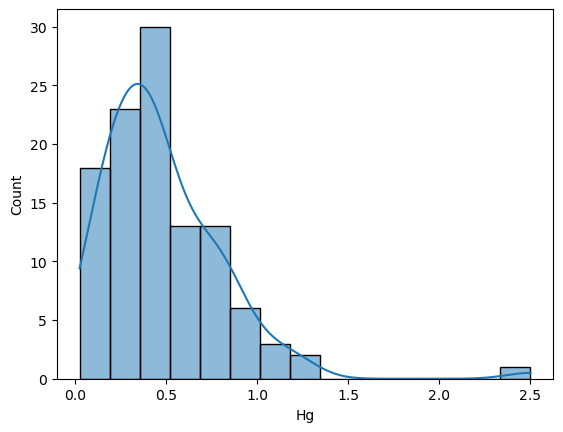

In [11]:
plt = sns.histplot(mercury_levels, kde = True)

The distribution of the mercury levels apprears to be positive skewed

##### Analyzing the impact of Dams and man-made structures on the mercury levels found in fish ####

In [12]:
dam_present = df.groupby('DAM')
mean_by_dam = dam_present['Hg'].mean()
Hg_std_dev_by_dam = dam_present['Hg'].std()

In [13]:
mean_by_dam

DAM
0.0    0.525578
1.0    0.447891
Name: Hg, dtype: float64

In [14]:
Hg_std_dev_by_dam

DAM
0.0    0.309927
1.0    0.356420
Name: Hg, dtype: float64

#### Analyzing the correlation between Lake type and mercury levels ####

In [24]:
lake_type = df.groupby('LT')
mean_by_lake = lake_type['Hg'].mean()
std_dev_by_type = lake_type['Hg'].std()

In [27]:
# 1: Oligotrophic
# 2: Eutrophic
# 3: Mesotrophic
print(Hg_std_dev)
mean_by_lake

0.33869446863698127


LT
1.0    0.382632
2.0    0.552755
3.0    0.438073
Name: Hg, dtype: float64

In [22]:
productivity = df.groupby('N')
mean_by_productivity = productivity['Hg'].mean()
std_dev_by_type = lake_type['Hg'].std()

In [23]:
mean_by_productivity

N
1    0.620000
2    0.334500
3    0.446733
4    0.584375
5    0.480000
Name: Hg, dtype: float64